<a href="https://colab.research.google.com/github/janhvi06/Mini-Project/blob/main/Image_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount drive command

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Gathering:** *Reference link of Kaggle Dataset of are the subsets will be used in the training data for this only image classifier project* https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda

*Drive link for the Dataset Folder* : https://drive.google.com/drive/folders/1zQPiGmu7YRQmRKB9MsURdynHbxpbc4wH?usp=sharing

#Preprocessing
  

1.   Resizing
2.   Flattening 

In [2]:
#resize and flatten

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/IMAGES'

categories = ['CATS','DOGS','PANDAS']

target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))  
    flat_data.append(img_resized.flatten())
    target.append(i)

flat_data  = np.array(flat_data)
target = np.array(target)

In [3]:
#Creating Dataframe

df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.657113,0.643951,0.577284,0.644314,0.620667,0.557093,0.633576,0.599982,0.540308,0.650597,0.603944,0.548636,0.633134,0.586193,0.531252,0.647809,0.618157,0.557613,0.629811,0.610054,0.546381,0.660431,0.641506,0.585624,0.649046,0.621595,0.582379,0.631686,0.604235,0.565020,0.625496,0.598045,0.558830,0.630219,0.602768,0.563552,0.648275,0.620824,0.581608,0.611925,...,0.633647,0.606196,0.582667,0.653984,0.626533,0.603003,0.667490,0.640039,0.616510,0.692105,0.664654,0.641124,0.699856,0.672405,0.648876,0.694612,0.667161,0.643631,0.702948,0.675498,0.651968,0.703233,0.675782,0.652253,0.674653,0.647202,0.623672,0.687281,0.659830,0.636301,0.669995,0.642544,0.619014,0.666667,0.639216,0.615686,0.670588,0.643137,0.619608,CATS
1,0.155556,0.055124,0.008065,0.333229,0.224954,0.120601,0.341237,0.230349,0.122680,0.360183,0.244767,0.127438,0.371307,0.253373,0.141176,0.364383,0.255503,0.148536,0.341969,0.245556,0.147133,0.340889,0.258248,0.171686,0.272510,0.201730,0.124126,0.214776,0.157769,0.111730,0.153908,0.118902,0.112876,0.085194,0.046680,0.040941,0.047695,0.007460,0.002423,0.055856,...,0.507808,0.525887,0.559076,0.525760,0.542627,0.572915,0.628967,0.643412,0.674209,0.649630,0.661747,0.689739,0.727115,0.738627,0.765917,0.719464,0.732379,0.756863,0.706135,0.713216,0.739102,0.707059,0.687390,0.717582,0.701961,0.685608,0.712484,0.713756,0.702854,0.729316,0.722044,0.714871,0.738113,0.690484,0.692588,0.714013,0.687168,0.693512,0.713120,CATS
2,0.619608,0.686275,0.780392,0.609373,0.679961,0.774078,0.603922,0.674510,0.768627,0.599647,0.670235,0.764353,0.588902,0.659490,0.753608,0.590836,0.661424,0.753306,0.602706,0.673294,0.751725,0.592157,0.662745,0.741176,0.592157,0.659647,0.738078,0.592157,0.658824,0.737255,0.591098,0.658824,0.737255,0.588235,0.654863,0.737216,0.598199,0.661265,0.713725,0.595608,...,0.813725,0.788876,0.714065,0.843020,0.793432,0.730007,0.854261,0.776588,0.723908,0.856000,0.773190,0.704419,0.859647,0.774519,0.692624,0.855294,0.769660,0.680137,0.846285,0.760651,0.673359,0.859099,0.771870,0.704379,0.872479,0.787569,0.740536,0.885051,0.815966,0.770138,0.870244,0.849292,0.781358,0.869477,0.847673,0.775974,0.895054,0.813817,0.755503,CATS
3,0.607015,0.591329,0.544270,0.619608,0.603922,0.556863,0.627451,0.611765,0.564706,0.627451,0.611765,0.564706,0.625490,0.611765,0.562745,0.624357,0.611765,0.553769,0.617821,0.604575,0.555242,0.624523,0.608837,0.569124,0.616680,0.600993,0.568967,0.620436,0.603434,0.568148,0.617647,0.601961,0.554902,0.620261,0.604575,0.557516,0.622048,0.606362,0.559303,0.610301,...,0.433961,0.395233,0.356017,0.462745,0.415686,0.371068,0.447529,0.393124,0.343608,0.425656,0.370754,0.323041,0.459617,0.404715,0.363059,0.451948,0.396052,0.364680,0.460645,0.405089,0.375198,0.431233,0.391190,0.352802,0.467163,0.427948,0.388732,0.459808,0.420593,0.381377,0.435451,0.396235,0.357020,0.431399,0.394144,0.354928,0.426135,0.398519,0.359303,CATS
4,0.385804,0.405412,0.416536,0.376980,0.405843,0.386824,0.371778,0.414469,0.375254,0.377961,0.425020,0.403176,0.375535,0.413053,0.426426,0.395775,0.407843,0.439216,0.398549,0.412929,0.425516,0.385259,0.403529,0.389573,0.396078,0.417176,0.382144,0.404327,0.415281,0.387020,0.399804,0.399359,0.398314,0.400000,0.412288,0.408729,0.391706,0.420974,0.411438,0.379513,...,0.507248,0.562150,0.566072,0.504043,0.558945,0.561912,0.506928,0.569373,0.548667,0.501961,0.572549,0.550389,0.483908,0.553954,0.551733,0.443188,0.496878,0.475541,0.221213,0.243919,0.176756,0.180630,0.226159,0.139582,0.167574,0.226398,0.126980,0.177277,0.222466,0.124214,0.189122,0.213149,0.136156,0.194000,0.205035,0.154054,0.151485,0.211974,0.102636,CATS
...,...,...,...,...,...,...,...,..

## Hyperparameter Tuning using Support Vector Machine (SVM)

In [4]:
#Splitting of Data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

# Evaluation through Classification Report and Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix,classification_report

In [7]:
#Confusion Matrix

y_pred = clf.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[6, 3, 1],
       [2, 5, 0],
       [1, 1, 8]])

In [8]:
#Classification Report

classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n        CATS       0.67      0.60      0.63        10\n        DOGS       0.56      0.71      0.63         7\n      PANDAS       0.89      0.80      0.84        10\n\n    accuracy                           0.70        27\n   macro avg       0.70      0.70      0.70        27\nweighted avg       0.72      0.70      0.71        27\n'

## Testing of the Model (predicting for a new image)

In [9]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

Enter your URL or image path/content/drive/MyDrive/IMAGES/Testing_Data/cat.jpg
(500, 500, 3)
PREDICTED OUTPUT: ['CATS']


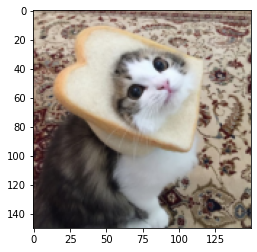

In [10]:
model = pickle.load(open('img_model.p','rb'))
flat_data = []
url = input('Enter your URL or image path')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)

print(f'PREDICTED OUTPUT: {y_out}')